In [1]:
import numpy as np
import pandas as pd
from tsne import tsne
import matplotlib.pyplot as plt

In [2]:
directory = "./"

train_data = pd.read_csv(directory+'train.csv')
test_data = pd.read_csv(directory+'test.csv')

train_x = train_data.drop(['id', 'label'], axis = 1).values
train_y = train_data['label'].values
test_x = test_data.drop(['id', 'label'], axis=1).values
test_y = test_data['label'].values

In [3]:
# print(train_x.shape)
# print(test_x.shape)
# print(train_y)

train_x = np.where(train_x >= 127, 1, 0)
test_x = np.where(test_x >= 127, 1, 0)
# print(h_choices[0, np.arange(10)])

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# a = np.random.randn(10)
# print(a)
# print(sigmoid(a/2 -1))

# print(np.outer(np.arange(5), np.arange(10)))

200 1e-07 1
Done


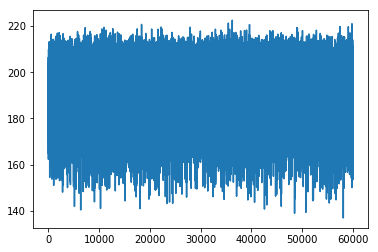

(10000, 200)
[1.32739854e-07 9.99999931e-01 9.99996747e-01 9.78345485e-12
 3.00157480e-02 9.99999998e-01 1.54197579e-05 8.32318754e-01
 6.40393274e-18 9.98030093e-01 1.00000000e+00 1.00000000e+00
 9.04063862e-04 1.26624024e-09 2.54798768e-14 7.27907096e-12
 9.99999998e-01 9.13643607e-01 5.23967581e-04 9.95567541e-01
 3.55190646e-06 9.99998147e-01 7.57392951e-02 1.00000000e+00
 4.04560591e-11 9.99994152e-01 1.34785131e-11 5.55526976e-01
 4.50703568e-07 5.79715613e-09 9.97884697e-01 2.79344142e-03
 4.78057728e-17 9.98130919e-01 9.99998939e-01 9.99454971e-01
 9.99999621e-01 9.97937779e-01 2.76013802e-07 1.00000000e+00
 6.88552058e-04 2.37859215e-01 9.99748704e-01 7.61941953e-15
 6.58722110e-15 9.99987774e-01 6.92828162e-15 1.35752147e-04
 9.99991508e-01 6.58017792e-01 9.99978027e-01 1.20660080e-10
 5.28040906e-04 9.82451051e-01 3.18654933e-06 9.99348056e-01
 9.99729354e-01 1.79399974e-03 9.51533279e-01 1.00000000e+00
 1.70437380e-21 4.02916538e-01 9.96797353e-01 3.86788808e-08
 9.50779200

<Figure size 432x288 with 0 Axes>

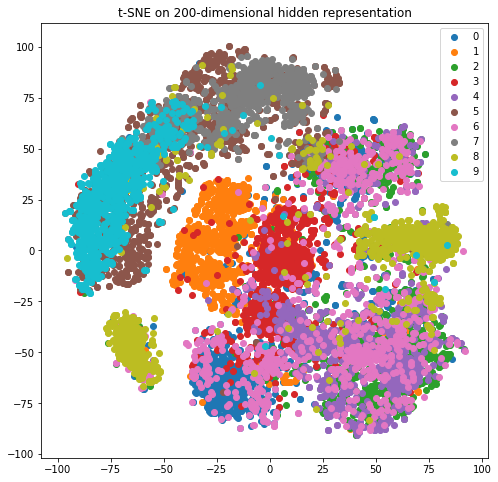

200 1e-07 20
Done


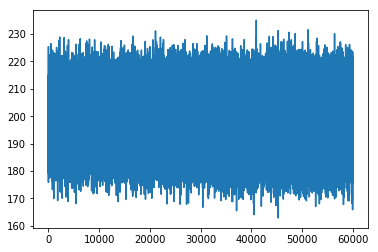

(10000, 200)
[9.33520573e-02 1.32643180e-11 5.36897277e-09 9.95021035e-01
 1.92907209e-08 1.00000000e+00 3.88788817e-04 9.97683400e-05
 9.99999999e-01 1.64551292e-02 4.86765603e-04 5.20672165e-05
 4.05231455e-12 9.99034413e-01 9.94738026e-01 5.89216939e-03
 5.78646416e-01 4.19752949e-05 9.98364553e-01 9.72362233e-01
 1.61681990e-02 6.37870346e-01 9.99999673e-01 1.37270537e-04
 3.00696604e-01 9.46126522e-01 5.43493766e-08 5.22691387e-01
 1.95238567e-12 5.83867769e-05 3.29863640e-04 1.36596193e-07
 5.16647091e-15 9.99970567e-01 4.95625630e-07 9.99953745e-01
 9.99983264e-01 2.21965157e-07 9.98021214e-01 6.42180002e-12
 2.13397156e-06 1.45680759e-04 1.01849646e-04 9.99861940e-01
 6.82374003e-01 2.16054733e-01 9.97645587e-01 6.64816494e-04
 2.81573468e-02 9.91084718e-01 9.98206635e-01 1.79084143e-01
 9.99823776e-01 7.51229141e-03 8.20209703e-01 2.96910820e-09
 1.89193887e-08 2.47864850e-05 3.20437121e-06 9.99962900e-01
 9.65488988e-01 4.22526320e-07 9.99995060e-01 9.99963504e-01
 5.99856758

<Figure size 432x288 with 0 Axes>

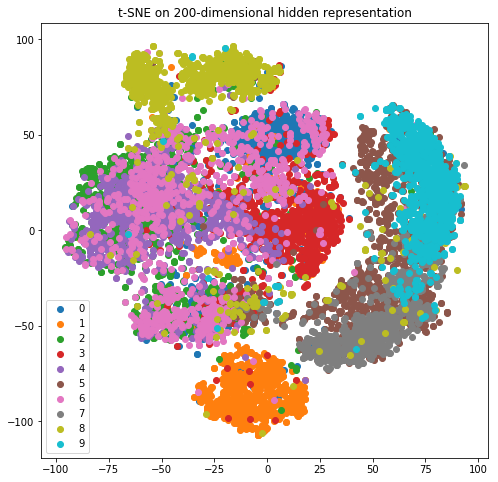

<Figure size 432x288 with 0 Axes>

In [5]:
# h_ns = [50, 150]
# lrs = [.000001, 0.0000001, .00000001]
# ks = [1, 3, 5, 10, 20]

h_ns = [200]
lrs = [0.0000001]
ks = [1, 20]
for k in ks:
    for h_n in h_ns:
        for learning_rate in lrs:
            print(h_n, learning_rate, k)
    #         h_n = 100
            v_m = 784

            W = np.random.randn(h_n, v_m)
            b = np.random.randn(v_m)-2
            c = np.random.randn(h_n)-2
#             k = 10
    #         learning_rate = .00000001

            norms = []

            for x in train_x:

                v_t = np.copy(x)
                h_t = np.zeros(h_n)

                for _ in range(k):
            #         for i in range(h_n):
                    pro_samples = np.random.rand(h_n)
                    probs = sigmoid(np.matmul(W, v_t) + c)
                    h_t = np.where(probs < pro_samples, 1, 0)

                    pro_samples = np.random.rand(v_m)
                    probs = sigmoid(np.matmul(h_t.T, W) + b)
                    v_t = np.where(probs < pro_samples, 1, 0)

                update_c_by_vd = sigmoid(np.matmul(W, x) + c)
                update_c_by_vt = sigmoid(np.matmul(W, v_t) + c)
            #     print(update_c_by_vd.shape)
            #     print(update_c_by_vd.T)a
                update_W_by_vd = np.outer(update_c_by_vd, x)
                update_W_by_vt = np.outer(update_c_by_vt, v_t)
            #     print(update_W_by_vd.shape)

                norms.append(np.linalg.norm(update_W_by_vd - update_W_by_vt)+ \
                             np.linalg.norm(x - v_t) + \
                             np.linalg.norm(update_c_by_vd - update_c_by_vt))

                W = W + learning_rate * (update_W_by_vd - update_W_by_vt)
                b = b + learning_rate * (x - v_t)
                c = c + learning_rate * (update_c_by_vd - update_c_by_vt)
            #     input()

            print("Done")
            plt.plot(norms)
            plt.show()
            plt.clf()

            probs = sigmoid(np.matmul(test_x, W.T) + c)
            pro_samples = np.random.rand(test_x.shape[0], h_n)

            hidden_rep = np.where(probs < pro_samples, 1, 0)
#             hidden_rep = probs

            print(hidden_rep.shape)
            print(hidden_rep[np.random.randint(0, test_x.shape[0])])

#             hidden_rep = hidden_rep[:2500]
#             test_y = test_y[:2500]

            Y= tsne(hidden_rep, 2, h_n, 20.0)
            fig, ax = plt.subplots(figsize=(8,8))
            for g in np.unique(test_y):
                i = np.where(test_y == g)
                ax.scatter(Y[i,0], Y[i,1], label=int(g))
            plt.title("t-SNE on "+str(h_n)+"-dimensional hidden representation")
            plt.legend()
            plt.savefig(directory+"clusters_"+str(h_n)+"_"+str(learning_rate).replace('.','')+"_"+str(k)+".png")
            plt.show()
            plt.clf()